In [1]:
import deeplabcut
import os

2022-10-10 16:02:38.904952: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-10 16:02:39.399716: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-10 16:02:39.399733: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-10 16:02:39.483069: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-10 16:02:40.497585: W tensorflow/stream_executor/platform/de

Loading DLC 2.2.2...


In [2]:
where = '/home/sobolev/projects/sandbox/'
video_folder = os.path.join(where, 'dlc_videos')
config_path = os.path.join(where, 'ppc-sl-test-Andrey-2022-10-07', 'config.yaml')

In [8]:
# create project
config_path = deeplabcut.create_new_project(
    project='ppc-sl-test',
    experimenter='Andrey',
    videos=[video_folder],
    videotype='.avi',
    copy_videos=True,
    working_directory=where
)

Created "/home/sobolev/projects/sandbox/ppc-sl-test-Andrey-2022-10-07/videos"
Created "/home/sobolev/projects/sandbox/ppc-sl-test-Andrey-2022-10-07/labeled-data"
Created "/home/sobolev/projects/sandbox/ppc-sl-test-Andrey-2022-10-07/training-datasets"
Created "/home/sobolev/projects/sandbox/ppc-sl-test-Andrey-2022-10-07/dlc-models"
2  videos from the directory /home/sobolev/projects/sandbox/dlc_videos were added to the project.
Copying the videos
/home/sobolev/projects/sandbox/ppc-sl-test-Andrey-2022-10-07/videos/video1.avi
/home/sobolev/projects/sandbox/ppc-sl-test-Andrey-2022-10-07/videos/video2.avi
Generated "/home/sobolev/projects/sandbox/ppc-sl-test-Andrey-2022-10-07/config.yaml"

A new project with name ppc-sl-test-Andrey-2022-10-07 is created at /home/sobolev/projects/sandbox and a configurable file (config.yaml) is stored there. Change the parameters in this file to adapt to your project's needs.
 Once you have changed the configuration file, use the function 'extract_frames' to

In [11]:
deeplabcut.extract_frames(project_path, userfeedback=False)

Config file read successfully.
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 599.92  seconds.
Extracting and downsampling... 11999  frames from the video.


11999it [01:04, 187.24it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 599.98  seconds.
Extracting and downsampling... 12000  frames from the video.


12000it [01:02, 192.97it/s]


Kmeans clustering ... (this might take a while)
Frames were successfully extracted, for the videos listed in the config.yaml file.

You can now label the frames using the function 'label_frames' (Note, you should label frames extracted from diverse videos (and many videos; we do not recommend training on single videos!)).


In [7]:
deeplabcut.label_frames(config_path)


(ipykernel_launcher.py:637066): Gtk-WARNING **: 13:38:19.243: Negative content height -9 (allocation 1, extents 5x5) while allocating gadget (node button, owner GtkToggleButton)

(ipykernel_launcher.py:637066): Gtk-WARNING **: 13:49:07.267: Negative content height -9 (allocation 1, extents 5x5) while allocating gadget (node button, owner GtkToggleButton)

(ipykernel_launcher.py:637066): Gtk-WARNING **: 13:49:07.299: Negative content height -9 (allocation 1, extents 5x5) while allocating gadget (node button, owner GtkToggleButton)

(ipykernel_launcher.py:637066): Gtk-WARNING **: 13:49:07.315: Negative content height -9 (allocation 1, extents 5x5) while allocating gadget (node button, owner GtkToggleButton)

(ipykernel_launcher.py:637066): Gtk-WARNING **: 13:49:07.333: Negative content height -9 (allocation 1, extents 5x5) while allocating gadget (node button, owner GtkToggleButton)

(ipykernel_launcher.py:637066): Gtk-WARNING **: 13:49:07.348: Negative content height -9 (allocation 1, 

You can now check the labels, using 'check_labels' before proceeding. Then, you can use the function 'create_training_dataset' to create the training dataset.


In [10]:
deeplabcut.check_labels(config_path),

Creating images with labels by Andrey.


100%|██████████████████████████████████████████████████████████████████████████████| 50/50 [00:08<00:00,  6.06it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


(None,)

In [11]:
deeplabcut.create_training_dataset(config_path, num_shuffles=1)

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([26, 86,  2, 55, 75, 93, 16, 73, 54, 95, 53, 92, 78, 13,  7, 30, 22,
          24, 33,  8, 43, 62,  3, 71, 45, 48,  6, 99, 82, 76, 60, 80, 90, 68,
          51, 27, 18, 56, 63, 74,  1, 61, 42, 41,  4, 15, 17, 40, 38,  5, 91,
          59,  0, 34, 28, 50, 11, 35, 23, 52, 10, 31, 66, 57, 79, 85, 32, 84,
          14, 89, 19, 29, 49, 97, 98, 69, 20, 94, 72, 77, 25, 37, 81, 46, 39,
          65, 58, 12, 88, 70, 87, 36, 21, 83,  9]),
   array([96, 67, 64, 47, 44])))]

In [13]:
deeplabcut.train_network(config_path, maxiters=10000)

Config:
{'all_joints': [[0], [1], [2]],
 'all_joints_names': ['bodypart1', 'bodypart2', 'bodypart3'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ppc-sl-testOct7/ppc-sl-test_Andrey95shuffle1.mat',
 'dataset_type': 'default',
 'decay_steps': 30000,
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/sobolev/projects/pySIT/lib/python3.8/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supe

Selecting single-animal trainer
Batch Size is 1
Loading ImageNet-pretrained resnet_50
Max_iters overwritten as 10000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/home/sobolev/projects/sandbox/ppc-sl-test-Andrey-2022-10-07/dlc-models/iteration-0/ppc-sl-testOct7-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'default', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairwise_predict': False, 'all_joints': 

iteration: 1000 loss: 0.0155 lr: 0.005
iteration: 2000 loss: 0.0075 lr: 0.005
iteration: 3000 loss: 0.0061 lr: 0.005
iteration: 4000 loss: 0.0055 lr: 0.005
iteration: 5000 loss: 0.0052 lr: 0.005
iteration: 6000 loss: 0.0048 lr: 0.005
iteration: 7000 loss: 0.0046 lr: 0.005
iteration: 8000 loss: 0.0044 lr: 0.005
iteration: 9000 loss: 0.0043 lr: 0.005
iteration: 10000 loss: 0.0041 lr: 0.005
2022-10-07 19:42:29.986641: W tensorflow/core/kernels/queue_base.cc:277] _1_fifo_queue: Skipping cancelled enqueue attempt with queue not closed
Exception in thread Thread-9:
Traceback (most recent call last):
  File "/home/sobolev/projects/pySIT/lib/python3.8/site-packages/tensorflow/python/client/session.py", line 1378, in _do_call
    return fn(*args)
  File "/home/sobolev/projects/pySIT/lib/python3.8/site-packages/tensorflow/python/client/session.py", line 1361, in _run_fn
    return self._call_tf_sessionrun(options, feed_dict, fetch_list,
  File "/home/sobolev/projects/pySIT/lib/python3.8/site-pac

The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


Running  DLC_resnet50_ppc-sl-testOct7shuffle1_10000  with # of training iterations: 10000


/home/sobolev/projects/pySIT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2022-10-10 16:02:56.728255: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-10 16:02:56.728662: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-10 16:02:56.728738: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (agp-linux): /proc/driver/nvidia/version does not exist
2022-10-10 16:02:56.729618: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) t

Running evaluation ...


100it [01:03,  1.56it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-10000
Results for 10000  training iterations: 95 1 train error: 12.64 pixels. Test error: 3.98  pixels.
With pcutoff of 0.6  train error: 12.55 pixels. Test error: 3.28 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.33it/s]


The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


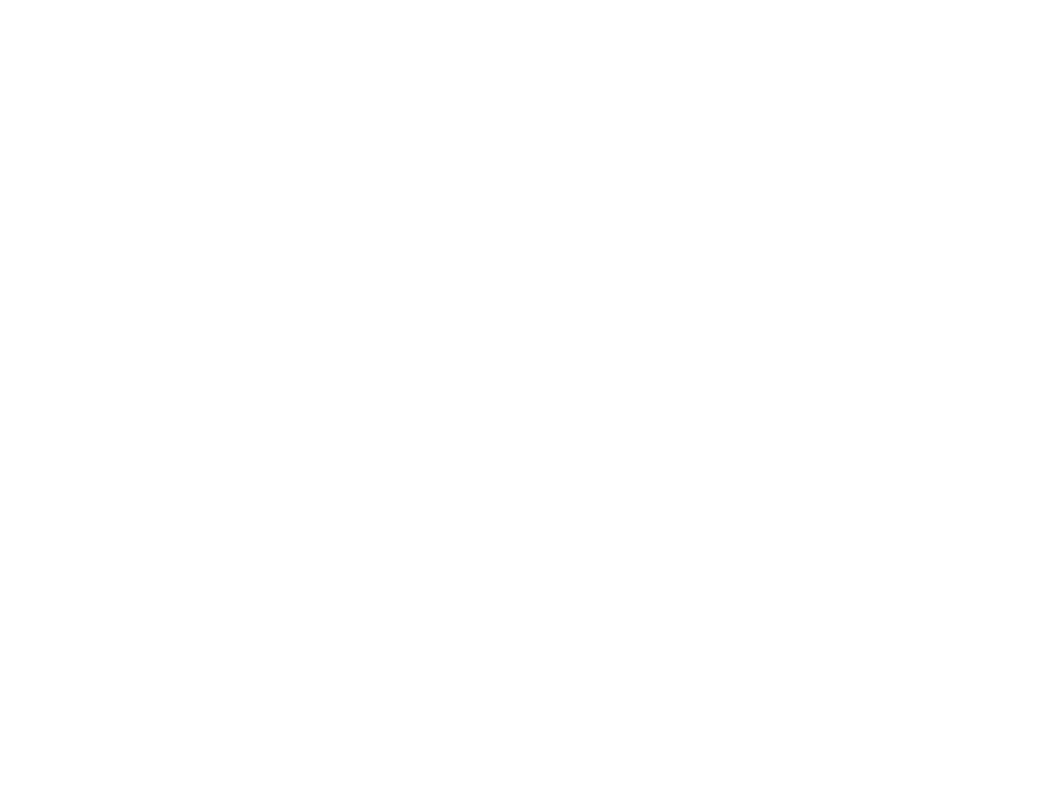

In [3]:
deeplabcut.evaluate_network(config_path, plotting=True)

In [6]:
video1_path = '/home/sobolev/projects/sandbox/ppc-sl-test-Andrey-2022-10-07/videos/DLC-test1.avi'
deeplabcut.analyze_videos(config_path,[video1_path], shuffle=1, save_as_csv=True, videotype='.avi')

Using snapshot-10000 for model /home/sobolev/projects/sandbox/ppc-sl-test-Andrey-2022-10-07/dlc-models/iteration-0/ppc-sl-testOct7-trainset95shuffle1
Starting to analyze %  /home/sobolev/projects/sandbox/ppc-sl-test-Andrey-2022-10-07/videos/DLC-test1.avi
Loading  /home/sobolev/projects/sandbox/ppc-sl-test-Andrey-2022-10-07/videos/DLC-test1.avi
Duration of video [s]:  600.0 , recorded with  20.0 fps!
Overall # of frames:  12000  found with (before cropping) frame dimensions:  1024 768
Starting to extract posture


100%|██████████████████████████████████████████████████████████████████████| 12000/12000 [1:58:28<00:00,  1.69it/s]


Saving results in /home/sobolev/projects/sandbox/ppc-sl-test-Andrey-2022-10-07/videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet50_ppc-sl-testOct7shuffle1_10000'

In [50]:
# read data from .csv
import numpy as np
import h5py, json

# this is the video from 008229_hippoSIT_2022-05-17_21-44-43
res_path = '/home/sobolev/projects/sandbox/ppc-sl-test-Andrey-2022-10-07/videos'
f_name = 'DLC-test1DLC_resnet50_ppc-sl-testOct7shuffle1_10000.csv'

data = np.genfromtxt(os.path.join(res_path, f_name), delimiter=',', skip_header=3)
data.shape  # idx, x1, y1, p1, x2, y2, p2, x3, y3, p3 

(12000, 10)

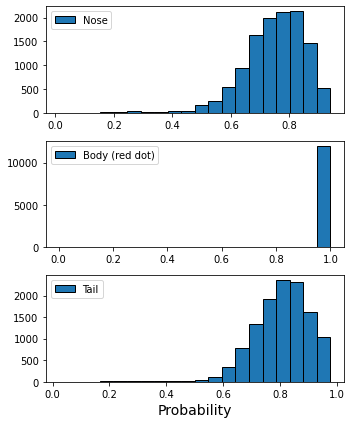

In [51]:
# detection probability distributions
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(5, 6))

bins = 20
titles = ['Nose', 'Body (red dot)', 'Tail']
for i in range(3):
    axes[i].hist(data[:, i*3 + 3], bins=bins, edgecolor='black', label=titles[i])
    axes[i].legend(loc='upper left')
axes[2].set_xlabel('Probability', fontsize=14)
fig.tight_layout()

In [54]:
# test quality with actual position tracking
source = '/home/sobolev/nevermind/Andrey/data/008229/008229_hippoSIT_2022-05-17_21-44-43/'
f_name = '008229_hippoSIT_2022-05-17_21-44-43.h5'
h5name = os.path.join(source, f_name)

with h5py.File(h5name, 'r') as f:
    tl = np.array(f['processed']['timeline'])  # time, X, Y, speed, etc.
    cfg = json.loads(f['processed'].attrs['parameters'])

In [73]:
# convert DLC predictions to meters
pos_cfg = cfg['position']
pixel_size = pos_cfg['floor_r_in_meters'] / float(pos_cfg['floor_radius'])

x1_m = (pos_cfg['arena_x'] - data[:, 1]) * pixel_size * (-1 if pos_cfg['flip_x'] else 1)
y1_m = (pos_cfg['arena_y'] - data[:, 2]) * pixel_size * (-1 if pos_cfg['flip_y'] else 1)
x2_m = (pos_cfg['arena_x'] - data[:, 4]) * pixel_size * (-1 if pos_cfg['flip_x'] else 1)
y2_m = (pos_cfg['arena_y'] - data[:, 5]) * pixel_size * (-1 if pos_cfg['flip_y'] else 1)

Text(0.5, 1.0, 'Trajectory of animal center, example')

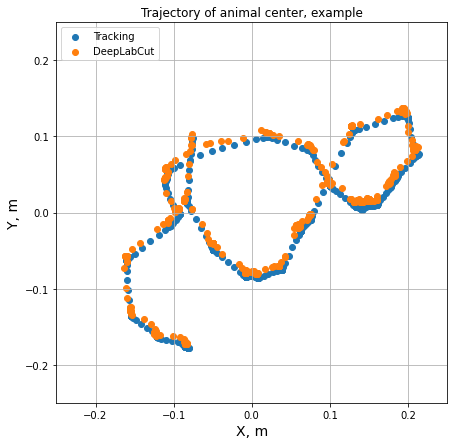

In [123]:
# example original / reconstructed trajectories
idx_start, idx_end = 1000, 1500

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.scatter(traj[:, 1][idx_start:idx_end], traj[:, 2][idx_start:idx_end], label='Tracking')
ax.scatter(x2_m[idx_start:idx_end], y2_m[idx_start:idx_end], label='DeepLabCut')
#ax.scatter(x1_m[idx_start:idx_end], y1_m[idx_start:idx_end], label='DeepLabCut - Nose')
ax.set_xlim(-0.25, 0.25)
ax.set_ylim(-0.25, 0.25)
ax.legend(loc='upper left')
ax.grid()
ax.set_xlabel('X, m', fontsize=14)
ax.set_ylabel('Y, m', fontsize=14)
ax.set_title('Trajectory of animal center, example')

In [115]:
from scipy import signal

# head direction as an angle between bodypart1 and bodypart2
x_hd = x1_m - x2_m
y_hd = y1_m - y2_m
phi = np.arctan2(y_hd, x_hd)

# smooth it a bit
#width = 40  # 100 points ~= 1 sec with at 100Hz
#kernel = signal.gaussian(width, std=(width) / 7.2)
#phi_smooth = np.convolve(phi, kernel, 'same') / kernel.sum()

Text(0.5, 0, 'Time, sec')

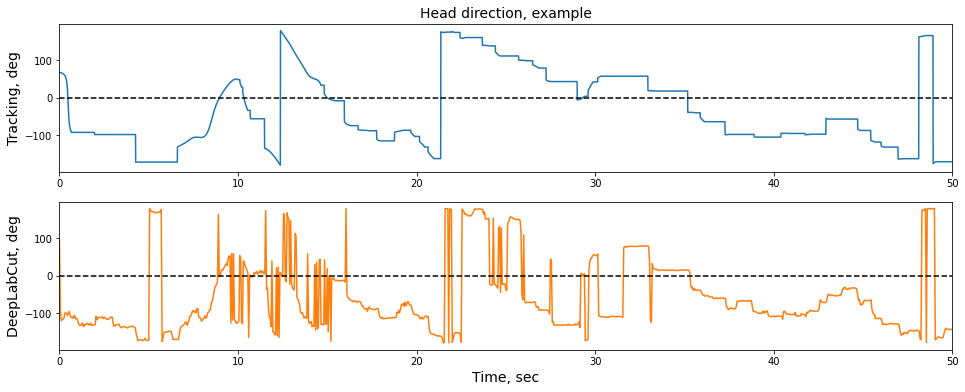

In [125]:
# tl is sampled 100Hz, we need 20, so take every 5th
idxs = np.arange(0, 5*len(data), 5)
xlim_l, xlim_r = 0, 50

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(211)
ax.plot(tl[:, 0], np.rad2deg(-tl[:, 4]))
ax.set_xlim(xlim_l, xlim_r)
ax.axhline(0, color='black', ls='--')
ax.set_title('Head direction, example', fontsize=14)
ax.set_ylabel('Tracking, deg', fontsize=14)

ax = fig.add_subplot(212)
ax.plot(tl[idxs][:, 0], np.rad2deg(phi), color='tab:orange')
ax.set_xlim(xlim_l, xlim_r)
ax.axhline(0, color='black', ls='--')
ax.set_ylabel('DeepLabCut, deg', fontsize=14)
ax.set_xlabel('Time, sec', fontsize=14)

In [71]:


# distance between points
diffs = np.sqrt(((traj[:, 1] - x_m)**2 + (traj[:, 2] - y_m)**2))

#plt.hist(diffs, bins=20)